In [33]:
#libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import scipy.stats
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
#read file
income=pd.read_csv('C:/Users/HUGO/Desktop/income_evaluation.csv')
#income=pd.read_csv("C:/Users/HUGO/Desktop/income_evaluation.csv",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],sep= "\t+|\s+\t+|\t+\s+",header=1)
income.head()  #32561 rows x 15 columns

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#know the types of data for each column
income.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [4]:
#we saw that the columns have a space before the name, so lets strip each space for each column
income.rename(columns=lambda x: x.strip(),inplace=True)

In [5]:
#is there any null?
income.isnull().any() #False, then true after replacing the "?"

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [6]:
#we are going to transform each object column to categorical number column:

    #1st.- count each category for each column:

for e in income.columns:
    x=income[e].value_counts()
    print(x)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [7]:
#as we saw some strange characters such as "?", and we don´t have info of it
income=income.replace(' ?',np.nan)

#so about the presence of nulls before we had false, but now we have true as we changed the '?' for a Nan

In [8]:
#count Nans
print(income['workclass'].isnull().sum())      #1836
print(income['occupation'].isnull().sum())     #1843
print(income['native-country'].isnull().sum()) #583

1836
1843
583


In [9]:
#then we have to reassign the text values into categorical numerical values:
#get_dummies:
columnas=['workclass','education','marital-status','occupation','relationship','race','sex']

In [10]:
#pd.get_dummies   (this function dumps the nans)
#a new database will be created:

income_dummy=pd.get_dummies(income, columns=columnas)
income_dummy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,Cuba,<=50K,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
#Seeing all values for all new columns:

for e in income_dummy.columns:
    x=income_dummy[e].value_counts()
    print(x)

In [11]:
#know the data types for the new columns
for e in income_dummy:
    print(income_dummy[e].dtype)  #columns 7 & 8 are object

#print(list(income_dummy.columns.values))  #native country y income son object

int64
int64
int64
int64
int64
int64
object
object
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [12]:
#we are going to group the countries by geographical location, so first we have to know the list of elements in it:
#we saw it is very large proportionated on the US, so we are going to group insted by number of occurrences
income_dummy['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [13]:
#label for native-country:
    #first we strip the blank space for its values
income_dummy['native-country']=income_dummy['native-country'].str.strip()

In [14]:
  #2nd transform to str
income_dummy['native-country']=income_dummy['native-country'].astype('str')

    #3rd label the column
labelEncoder=preprocessing.LabelEncoder()
income_dummy['native-country']=labelEncoder.fit_transform(income_dummy['native-country'])
income_dummy['native-country']

0        38
1        38
2        38
3        38
4         4
         ..
32556    38
32557    38
32558    38
32559    38
32560    38
Name: native-country, Length: 32561, dtype: int32

In [15]:
#now we have to 'fusionate' the categories:

condition=income_dummy['native-country']==38
column_name='native-country'
new_value=1

income_dummy.loc[condition, column_name]=new_value
income_dummy['native-country']   #part of 1s completed

0        1
1        1
2        1
3        1
4        4
        ..
32556    1
32557    1
32558    1
32559    1
32560    1
Name: native-country, Length: 32561, dtype: int32

In [16]:
#every other value than 1:
condition=(income_dummy['native-country'] != 1)
column_name='native-country'
new_value=0

income_dummy.loc[condition, column_name]=new_value
income_dummy['native-country'].value_counts()   #1 is from US, 0 is from everywhere else


1    29291
0     3270
Name: native-country, dtype: int64

In [17]:
#treat the income column
#object to string income
income['income']=income['income'].astype('str')
income['income'].dtype

dtype('O')

In [18]:
#label the column
labelEncoder=preprocessing.LabelEncoder()
income_dummy['income']=labelEncoder.fit_transform(income_dummy['income'])
income_dummy['income'].value_counts()

#0= '<=50K' --- 24720
#1= '>50K'  --- 7841

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
#Seeing all values for all new columns:

for e in income_dummy.columns:
    x=income_dummy[e].value_counts()
    print(x)

In [19]:
income_dummy.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [20]:
#balance data & spliting
x=income_dummy.loc[:,income_dummy.columns !='income']
x
y=income_dummy['income']

balanc=RandomOverSampler(random_state=12,sampling_strategy=.60)

#implementing oversampling to correct imbalanced data:
x_train_b, y_train_b=balanc.fit_sample(x,y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_b)))

Original dataset shape Counter({0: 24720, 1: 7841})
Resampled dataset shape Counter({0: 24720, 1: 14832})


In [21]:
#model 
#split dataset

X_test, X_train, y_test, y_train = train_test_split(x_train_b, y_train_b, test_size=0.80,random_state=10) # 80% training and 20% test

In [22]:
y_train.value_counts()  #less imbalanced

0    19799
1    11843
Name: income, dtype: int64

In [23]:
#Model xgboost:
params={'max_depth':6,'eta':0.05,"booster":"gbtree","objective":"binary:logistic","verbosity":2}
xgb_class=xgb.XGBClassifier(**params)

In [24]:
#Train the model using the training sets
xgb_class.fit(X_train, y_train)

[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:17:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[17:17:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:17:07] INFO: src/tree/updater_prune.cc:74: tree prun

XGBClassifier(eta=0.05, max_depth=6, verbosity=2)

In [25]:
#Predict the response for test dataset
y_pred = xgb_class.predict(X_test)
predictions=[round(value) for value in y_pred]

In [26]:
#accuracy
cmxg=confusion_matrix(y_test, predictions)   
cmxg

array([[4328,  593],
       [ 564, 2425]], dtype=int64)

In [27]:
#accuracy of the model:

def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmxg)
#85.37% acc

0.8537294563843236

In [29]:
#precision of the model

def prec(cm):
    rec=(cm[1][1])/(cm[0][1]+cm[1][1])
    return(rec)

prec(cmxg) #80.35%
    

0.8035122597746852

In [30]:
#recall of the model:
def rec(cm):
    rec=(cm[1][1])/(cm[1][0]+cm[1][1])
    return(rec)

rec(cmxg)  #81.13%

0.8113081298093008

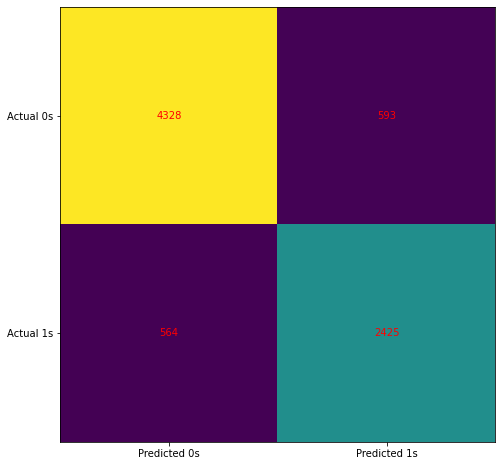

In [31]:
#Figure CM

def graphcm(cm):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    return(plt.show())

graphcm(cmxg)

In [34]:
#cross validation
scores = cross_val_score(xgb_class, x_train_b, y_train_b, cv=10)
scores
#array([0.84277048, 0.84807887, 0.86219975, 0.84197219, 0.85183312,
#       0.85233881, 0.86068268, 0.86093552, 0.85891277, 0.85183312])

[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[17:22:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[17:22:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[17:22:04] INFO: src/tree/updater_prune.cc:74: tree prun

array([0.84277048, 0.84807887, 0.86219975, 0.84197219, 0.85183312,
       0.85233881, 0.86068268, 0.86093552, 0.85891277, 0.85183312])

In [35]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#0.85 accuracy with a standard deviation of 0.01

0.85 accuracy with a standard deviation of 0.01
